# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic commandZ
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "./Resources/city_data.csv"
ride_data_to_load = "./Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
type_total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

type_total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
type_total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]

type_total_drivers


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
type_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

type_total_fares



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
type_avg_fares = (type_total_fares / type_total_rides)
type_avg_fares


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# Total driver count
type_total_drivers.sum()

68709

In [9]:
# 5. Get the average fare per driver for each city type. 
type_avg_fare_per_driver = (type_total_fares / type_total_drivers )
type_avg_fare_per_driver


type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
# Combine the data into a single dataset
pyber_summary_df = pd.DataFrame({
    "Total Rides": type_total_rides,
    "Total Drivers":type_total_drivers,
    "Total Fares": type_total_fares,
    "Average Fare per Ride": type_avg_fares,
    "Average Fare per Driver": type_avg_fare_per_driver
})



# Display the data table for preview
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.
# Formatting
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

# Display the data table for preview
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_total_fares_by_date = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_total_fares_by_date.head()

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
Name: fare, dtype: float64

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_total_fares_by_date = type_total_fares_by_date.reset_index()
type_total_fares_by_date.head()

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_total_fares_by_date_pivot = type_total_fares_by_date.pivot(index="date", columns="type", values="fare")
type_total_fares_by_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
from datetime import datetime

#urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
#type_total_fares_by_new = pyber_data_df.loc[(pyber_data_df.date >= "2019-01-01") & (pyber_data_df.date <= "2019-04-28")]
type_total_fares_by_new = pyber_data_df.loc[(pd.to_datetime(pyber_data_df["date"], format="%Y-%m-%d %H:%M:%S") >= pd.Timestamp(2010,1,1)) & (pd.to_datetime(pyber_data_df["date"], format="%Y-%m-%d %H:%M:%S") <= pd.Timestamp(2019,4,28))]
type_total_fares_by_new

type_total_fares_by_grpby = type_total_fares_by_new.groupby(["date", "type"]).sum()["fare"]

type_total_fares_by_grpby = type_total_fares_by_grpby.reset_index()
type_total_fares_by_grpby.head()


type_total_fares_by_date_pivot = type_total_fares_by_new.pivot(index="date", columns="type", values="fare")
type_total_fares_by_date_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [18]:
type_total_fares_by_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [19]:
type_total_fares_by_date_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-04-27 14:11:38,NaN,NaN,37.60
2019-04-27 14:37:32,NaN,45.77,NaN
2019-04-27 14:57:38,NaN,NaN,44.73
2019-04-27 16:20:00,NaN,NaN,6.62
2019-04-27 16:22:23,NaN,NaN,25.67
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28
2019-04-27 23:26:03,NaN,NaN,19.06


In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type_total_fares_by_date_pivot.index = pd.to_datetime(type_total_fares_by_date_pivot.index)

In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
type_total_fares_by_date_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_total_fares_by_date_pivot_week = type_total_fares_by_date_pivot.resample("W").sum()
type_total_fares_by_date_pivot_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [23]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


In [24]:
# Set the x_axis to a list of string for each month.
type_total_fares_by_date_pivot_week = type_total_fares_by_date_pivot_week.reset_index()


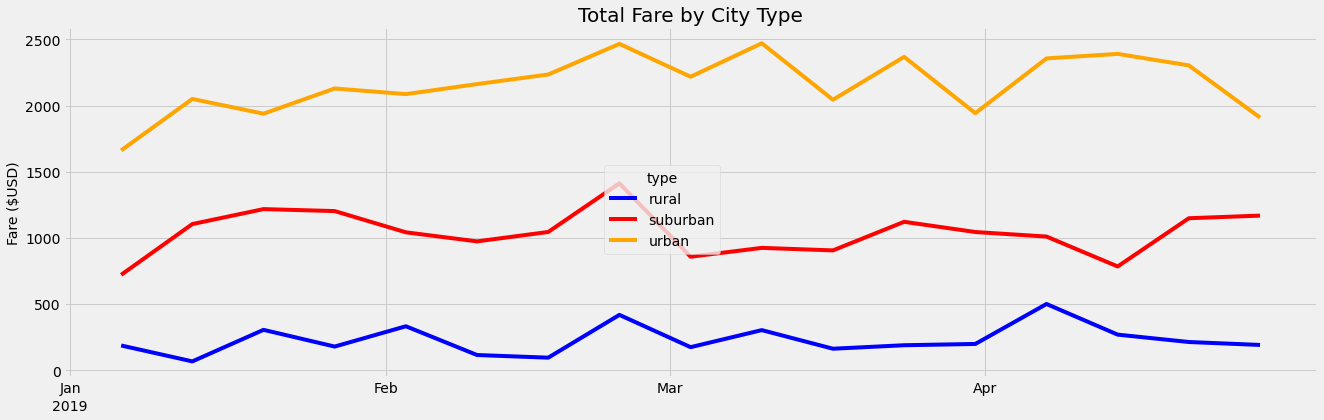

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.dates as md
fig, ax = plt.subplots(figsize=(20, 6), sharex=True, squeeze=True)

ax.set_title("Total Fare by City Type",fontsize=20)
ax.set_ylabel("Fare ($USD)",fontsize=14)
ax.set_xlabel("2019",fontsize=14, horizontalalignment="left", x=-0.01)

line1, = plt.plot(type_total_fares_by_date_pivot_week["date"], type_total_fares_by_date_pivot_week["Urban"], color="orange" )
line2, = plt.plot(type_total_fares_by_date_pivot_week["date"], type_total_fares_by_date_pivot_week["Suburban"], color="red")
line3, = plt.plot(type_total_fares_by_date_pivot_week["date"], type_total_fares_by_date_pivot_week["Rural"], color="blue")


ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(md.DateFormatter('%b'))

fig.legend([line3, line2, line1], ["rural", "suburban", "urban"], loc="center", title="type")

xticks = ax.xaxis.get_major_ticks()
xticks[-1].set_visible(False)
plt.show()

plt.savefig("analysis/PyBer_fare_summary.png")
